In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
import utils

In [32]:
def update(slope, intercept, x, y, learning_rate=0.01):
    prediction = slope * x + intercept
    d = y - prediction
    slope += learning_rate * x * d
    intercept += learning_rate * d
    return slope, intercept

In [33]:
def rmse(x, y):
    d = np.subtract(x, y)
    return np.sqrt(np.dot(d, d) / len(d))

In [34]:
def linear_regression(X, Y, learning_rate=0.01, epochs=1_000, visual=False, period=100):
    slope = random.random()
    intercept = random.random()
    errors = []
    
    if visual:
        utils.plot_points(X, Y)

    for epoch in range(epochs):
        i = random.randrange(len(X))
        slope, intercept = update(slope,
                                            intercept,
                                            X[i],
                                            Y[i],
                                            learning_rate=learning_rate)
        
        prediction = list(map(lambda x: slope * x + intercept, X))
        error = rmse(prediction, Y)
        errors.append(error)

        if visual and epoch % period == 0:
            utils.draw_line(slope, intercept)
    
    plt.show()
    if visual:
        plt.scatter(range(len(errors)), errors)
        plt.show()
        print(f'final rmse = {errors[-1]:.2f}')

    return slope, intercept

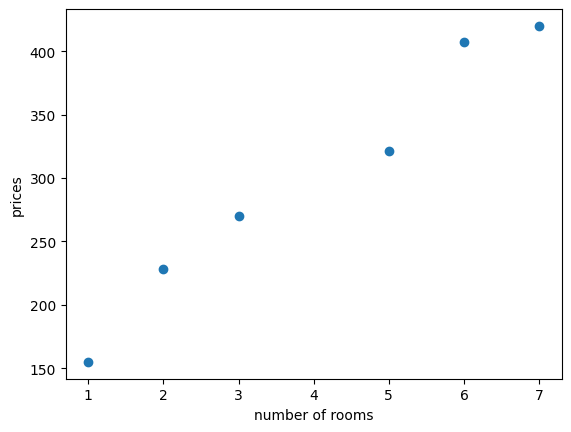

In [35]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 228, 270, 321, 407, 420])
utils.plot_points(features, labels)

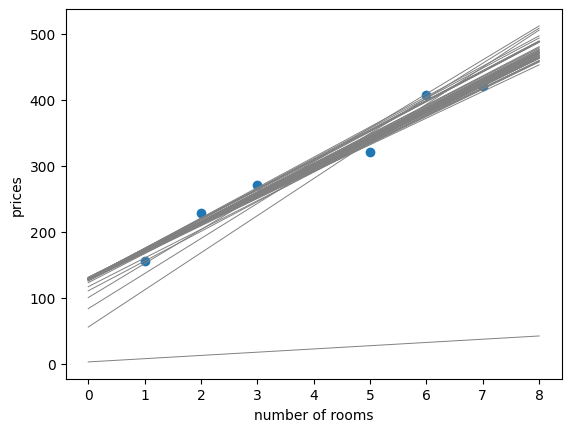

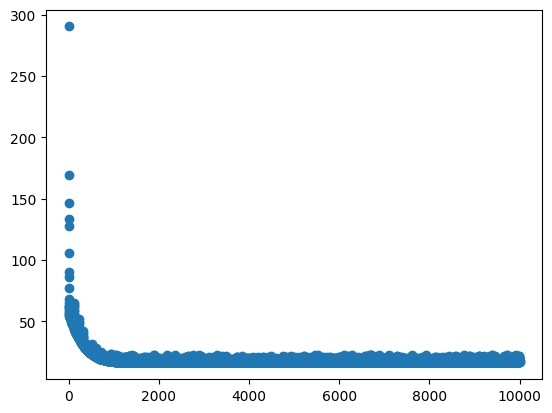

final rmse = 17.58


In [36]:
slope, intercept = linear_regression(features,
                                                               labels,
                                                               epochs=10_000,
                                                               visual=True,
                                                               period=200)

In [37]:
print(f'Price per room = {slope:.2f}$.')
print(f'Base house price = {intercept:.2f}$.')

Price per room = 44.37$.
Base house price = 128.09$.


In [38]:
r = 4
c = slope * r + intercept
print(f'Price of house with {r} rooms is {c:.2f}$.')

Price of house with 4 rooms is 305.56$.
